In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#está dando errado se tentar pegar as imagens do path images
files_path = [os.path.abspath(x) for x in os.listdir("./images/img400x_recorte_horizontal") if x.endswith('.png')]
print(files_path)

['/Users/wesleyaraujo/Documents/git/visaocomp/img400x_2.png', '/Users/wesleyaraujo/Documents/git/visaocomp/img400x_3.png', '/Users/wesleyaraujo/Documents/git/visaocomp/img400x_1.png']


img400x_2.png


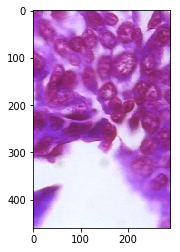

img400x_3.png


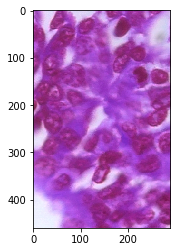

img400x_1.png


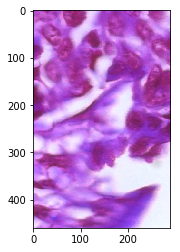

In [4]:
# diretorio, arquivo = path, filename = os.path.split(files_path[0])
# print(arquivo)
# img = cv2.imread(arquivo)
# plt.imshow(img)
# plt.show()
images = []
for i in files_path:
    diretorio, arquivo = path, filename = os.path.split(i)
    print(arquivo)
    img = cv2.imread(arquivo)
    images.append(img)
    plt.imshow(img)
    plt.show()
    


# SIFT

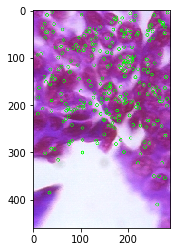

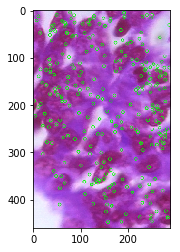

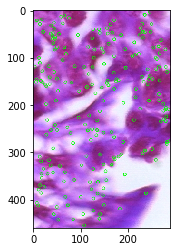

In [5]:
allSiftKeypoints = []
allSiftDescriptors = []
for i in images:
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(i, None)
    allSiftKeypoints.append(keypoints)
    allSiftDescriptors.append(descriptors)
    img2 = cv2.drawKeypoints(i, keypoints, None, color=(0,255,0), flags=0)
    plt.imshow(img2)
    plt.show()

In [11]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(allSiftDescriptors[2], allSiftDescriptors[0], k=2)
array = np.asarray(matches)
print(type(array[0][1]))

goodMatches = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        goodMatches.append(m)

img3 = cv2.drawMatchesKnn(images[2], allSiftKeypoints[2], images[0], allSiftKeypoints[0], goodMatches, None, flags=2)
plt.imshow(img3)
plt.show()

<class 'cv2.DMatch'>


SystemError: <built-in function drawMatchesKnn> returned NULL without setting an error

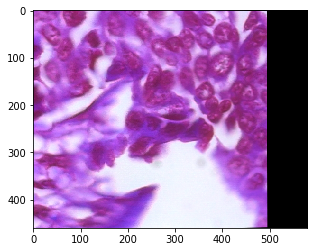

In [10]:
# if len(goodMatches) > 4:
#     points1 = np.float32([allSiftKeypoints[i] for (_, i) in goodMatches])
#     src
src_pts = np.asarray([allSiftKeypoints[2][m.queryIdx].pt for m in goodMatches])
dst_pts = np.asarray([allSiftKeypoints[0][m.trainIdx].pt for m in goodMatches])
# print(allSiftKeypoints)
# print(src_pts)

h, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC)


result = cv2.warpPerspective(images[0], h, (images[0].shape[1] + images[2].shape[1], images[0].shape[0]))
result[0:images[2].shape[0], 0:images[2].shape[1]] = images[2]
plt.imshow(result)
plt.show()
        